In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,boxcox

import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,SVR
from sklearn.metrics import r2_score,mean_absolute_error,max_error,accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv("winequality.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


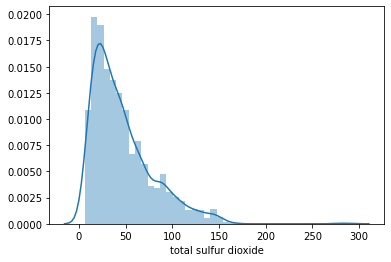

In [6]:
sns.distplot(data["total sulfur dioxide"])
plt.show()

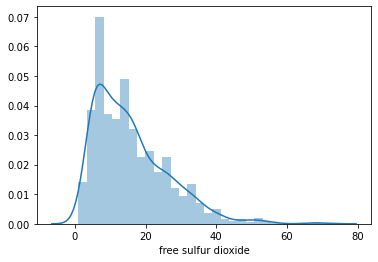

In [7]:
sns.distplot(data["free sulfur dioxide"])

In [8]:
data["free sulfur dioxide"].skew()

1.250567293314441

In [9]:
data["total sulfur dioxide"].skew()

1.515531257594554

In [10]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

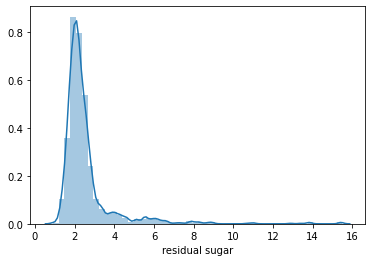

In [11]:
sns.distplot(data["residual sugar"])

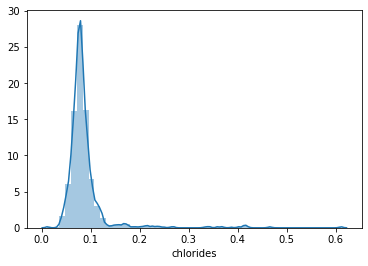

In [12]:
sns.distplot(data["chlorides"])

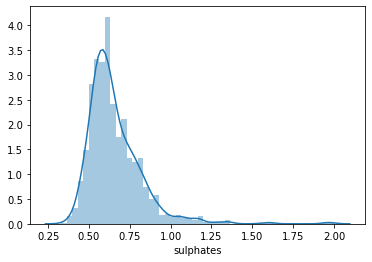

In [13]:
sns.distplot(data["sulphates"])

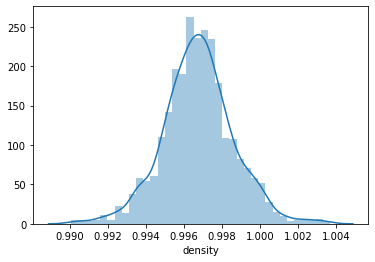

In [14]:
sns.distplot(data["density"])

fixed acidity              AxesSubplot(0.125,0.657941;0.168478x0.222059)
volatile acidity        AxesSubplot(0.327174,0.657941;0.168478x0.222059)
citric acid             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
residual sugar          AxesSubplot(0.731522,0.657941;0.168478x0.222059)
chlorides                  AxesSubplot(0.125,0.391471;0.168478x0.222059)
free sulfur dioxide     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
total sulfur dioxide    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
density                 AxesSubplot(0.731522,0.391471;0.168478x0.222059)
pH                            AxesSubplot(0.125,0.125;0.168478x0.222059)
sulphates                  AxesSubplot(0.327174,0.125;0.168478x0.222059)
alcohol                    AxesSubplot(0.529348,0.125;0.168478x0.222059)
quality                    AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

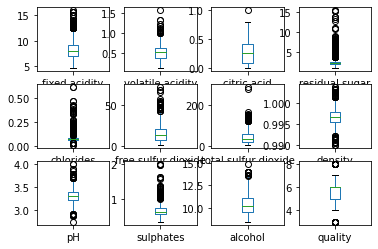

In [15]:
data.plot(kind="box",subplots=True,layout=(3,4))

In [16]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [17]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [18]:
z=np.abs(zscore(data))
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [19]:
df=data[(z<3).all(axis=1)]

In [20]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [21]:
df.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [22]:
from scipy.stats import boxcox
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=boxcox(df[col],0)

In [23]:
df.skew()

fixed acidity           0.377931
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.227096
chlorides               0.496272
free sulfur dioxide    -0.303456
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.342375
alcohol                 0.592414
quality                 0.407865
dtype: float64

In [24]:
df["residual sugar"]=np.log1p(df["residual sugar"])


In [25]:
df.skew()

fixed acidity           0.377931
volatile acidity        0.380659
citric acid             0.291297
residual sugar          0.629747
chlorides               0.496272
free sulfur dioxide    -0.303456
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.342375
alcohol                 0.592414
quality                 0.407865
dtype: float64

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

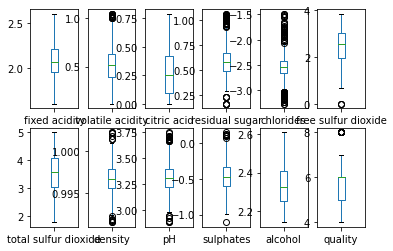

In [26]:
df.plot(kind="box",subplots=True,layout=(2,6))

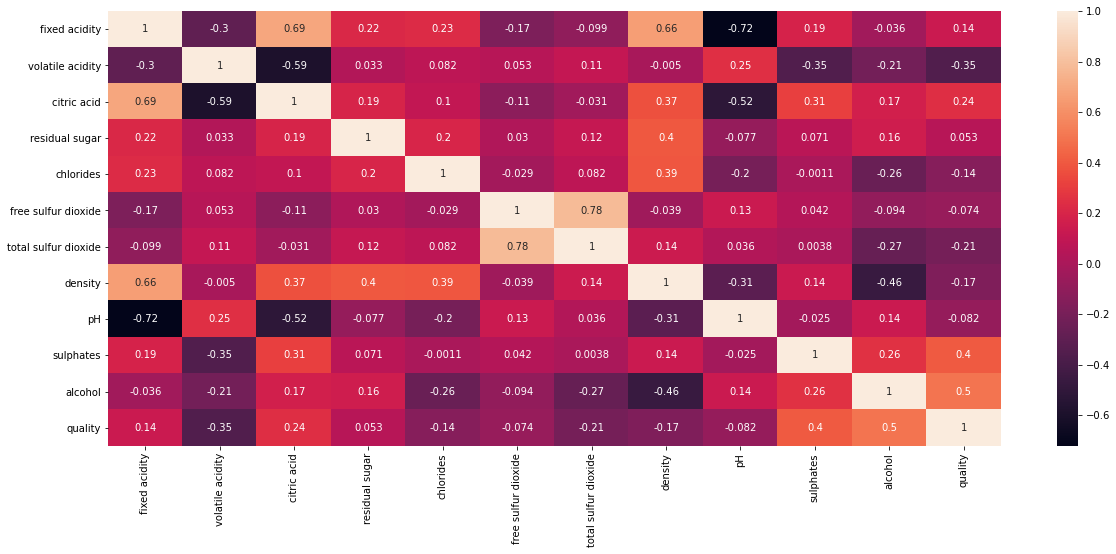

In [27]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [28]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
x.shape

(1451, 11)

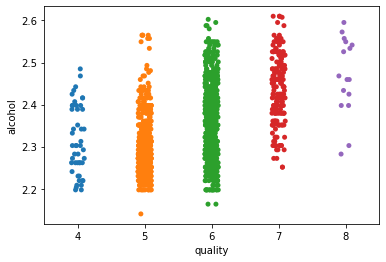

In [29]:
sns.stripplot(x=df["quality"],y=df["alcohol"],data=df)

In [30]:
model=[DecisionTreeClassifier(max_depth=50, ccp_alpha=0.001),DecisionTreeClassifier( criterion="entropy"),KNeighborsClassifier(),SVC(kernel="poly"),SVC(kernel="linear"),SVC()]

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

for i in model:
    print("**********************",i,"*******************")
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(i.score(x_train,y_train))
    print(classification_report(y_test,pred))
    print("\n")

********************** DecisionTreeClassifier(ccp_alpha=0.001, max_depth=50) *******************
0.659375
[[ 0  4  4  5  0]
 [ 1 98 26  7  0]
 [ 1 28 83 14  1]
 [ 0  5 10 28  1]
 [ 0  0  1  1  2]]
0.9717064544650752
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        13
           5       0.73      0.74      0.73       132
           6       0.67      0.65      0.66       127
           7       0.51      0.64      0.57        44
           8       0.50      0.50      0.50         4

    accuracy                           0.66       320
   macro avg       0.48      0.51      0.49       320
weighted avg       0.64      0.66      0.65       320



********************** DecisionTreeClassifier(criterion='entropy') *******************
0.640625
[[ 0  7  6  0  0]
 [ 6 96 25  5  0]
 [ 0 33 78 15  1]
 [ 0  3 10 30  1]
 [ 0  0  0  3  1]]
1.0
              precision    recall  f1-score   support

           4       0.00      0.00      0.00    

In [32]:
for c in model:
    print("------",c)
    score=cross_val_score(c,x,y,cv=6)
    print(score.mean())
    print("\n")

------ DecisionTreeClassifier(ccp_alpha=0.001, max_depth=50)
0.4583147582958975


------ DecisionTreeClassifier(criterion='entropy')
0.46726792633997466


------ KNeighborsClassifier()
0.46244413200278917


------ SVC(kernel='poly')
0.5651212235520043


------ SVC(kernel='linear')
0.5713338591497776


------ SVC()
0.5396219836996902


